# Descripción del proyecto

## Contexto

El departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 
    
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Descripción de los datos

## Datos utilizados en la primera parte del proyecto

`/datasets/hypotheses_us.csv`

  - `Hypotheses:` breves descripciones de las hipótesis
  - `Reach:` alcance del usuario, en una escala del uno a diez
  - `Impact:` impacto en los usuarios, en una escala del uno al diez
  - `Confidence:` confianza en la hipótesis, en una escala del uno al diez
  - `Effort:` los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

## Datos utilizados en la segunda parte del proyecto

`/datasets/orders_us.csv`

  - `transactionId:` identificador de pedido
  - `visitorId:` identificador del usuario que realizó el pedido
  - `date:` fecha del pedido
  - `revenue:` ingresos del pedido
  - `group:` el grupo del test A/B al que pertenece el usuario

`/datasets/visits_us.csv`

  - `date:` la fecha
  - `group:` grupo del test A/B
  - `visits:` el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

# **Parte 1.** Priorizar hipótesis

El archivo `hypotheses_us.csv` contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con `Reach`, `Impact`, `Confidence` y `Effort` especificados para cada una.

El ejercicio consiste en:

  - Aplicar el framework `ICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
  - Aplicar el framework `RICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
  - Mostrar cómo cambia la priorización de hipótesis cuando utilizas `RICE` en lugar de `ICE`. Proporcionar una explicación de los cambios.

# **Parte 2.** Análisis de test A/B

Realizaste un test A/B y obtuviste los resultados descritos en los archivos `orders_us.csv` y `visitors_us.csv.`

## Ejercicio

Analiza el test A/B:

  1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
  2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
  3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
  4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
  5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
  6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
  7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
  8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
  9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
  10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
  11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
  12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
  13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
      1. Para la prueba, considera a uno de los grupos como líder. 
      2. Para la prueba, concluye que no hay diferencia entre los grupos. 
      3. Continúa la prueba.

El proyecto será evaluado según estos criterios:

  - Cómo preparas los datos para el análisis
  - Cómo priorizas las hipótesis
  - Cómo interpretas los gráficos resultantes
  - Cómo calculas la significancia estadística
  - Qué conclusiones sacas con base en los resultados del test A/B
  - Si sigues la estructura del proyecto y mantienes el código ordenado
  - Las conclusiones que sacas
  - Si dejas comentarios en cada paso

# Proyecto 9

## *Preparar los datos para el analisis*

In [302]:
# Importar librerias
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [303]:
# Leer el archivos
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('datasets/orders_us.csv')
visits = pd.read_csv('datasets/visits_us.csv')

In [304]:
# Analizar los DataFrames
print('DataFrame hypotheses:')
print(hypotheses.info())
print('-'*50)
print('DataFrame orders:')
print(orders.info())
print('-'*50)
print('DataFrame visits:')
print(visits.info())

DataFrame hypotheses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
--------------------------------------------------
DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4

In [305]:
# Analizar si existe algun valor nulo
print('DataFrame hypotheses:')
print(hypotheses.isnull().sum())
print('-'*50)
print('DataFrame orders:')
print(orders.isnull().sum())
print('-'*50)
print('DataFrame visits:')
print(visits.isnull().sum())

DataFrame hypotheses:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64
--------------------------------------------------
DataFrame orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
--------------------------------------------------
DataFrame visits:
date      0
group     0
visits    0
dtype: int64


In [306]:
# Analizar si existe algun valor duplicado
print('Valores duplicados en hypotheses:', hypotheses.duplicated().sum())
print('-'*50)
print('Valores duplicados en orders:', orders.duplicated().sum())
print('-'*50)
print('Valores duplicados en visits:', visits.duplicated().sum())

Valores duplicados en hypotheses: 0
--------------------------------------------------
Valores duplicados en orders: 0
--------------------------------------------------
Valores duplicados en visits: 0


In [307]:
# Analizar los valores unicos
print('DataFrame hypotheses:')
print(hypotheses.nunique())
print('-'*50)
print('DataFrame orders:')
print(orders.nunique())
print('-'*50)
print('DataFrame visits:')
print(visits.nunique())

DataFrame hypotheses:
Hypothesis    9
Reach         6
Impact        7
Confidence    7
Effort        6
dtype: int64
--------------------------------------------------
DataFrame orders:
transactionId    1197
visitorId        1031
date               31
revenue           403
group               2
dtype: int64
--------------------------------------------------
DataFrame visits:
date      31
group      2
visits    58
dtype: int64


In [308]:
# Mostrar los datos
print('DataFrame hypotheses:')
display(hypotheses)
print('DataFrame orders:')
display(orders.head())
print('DataFrame visits:')
display(visits.head())

DataFrame hypotheses:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


DataFrame orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


DataFrame visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Observaciones

  - El DataFrame `hypotheses` y `orders` contienen en su columnas algunas mayusculas por lo que haremos el cambio a minusculas.
  - En el Dataframe `orders` observamos que los valores unicos de la columna `visitorId` solo hay *1031* valores unicos debiendo ser *1197*, esto nos indica que existen valores duplicados implicitos los cuales pueden afectar nuestro analisis de hipotesis mas adelante.
  - Cambiar los tipos de datos de algunas columnas en los DataFrames `orders` y `visits`

In [309]:
# Estadiaticos descriptivos del grupo A en orders
orders[orders['group'] == 'A']['revenue'].describe()

count     557.000000
mean      115.897487
std       182.358918
min         5.000000
25%        20.400000
50%        50.100000
75%       130.500000
max      1450.200000
Name: revenue, dtype: float64

In [310]:
# Estadiaticos descriptivos del grupo B en orders
orders[orders['group'] == 'B']['revenue'].describe()

count      640.000000
mean       145.063438
std        806.992326
min          5.100000
25%         24.050000
50%         50.350000
75%        130.225000
max      19920.400000
Name: revenue, dtype: float64

El grupo **B**; el grupo de muestra, tiene en comparacion al grupo **A**; el grupo de control:
  - Un promedio más alto (**145.06** en comparación con **115.89**)
  - Una mediana similar (**50.34** en comparación con **50.10**) 

In [311]:
# Estadiaticos descriptivos del grupo A en visits
visits[visits['group'] == 'A']['visits'].describe()

count     31.000000
mean     604.387097
std      112.396227
min      361.000000
25%      541.000000
50%      619.000000
75%      705.000000
max      756.000000
Name: visits, dtype: float64

In [312]:
# Estadiaticos descriptivos del grupo B en visits
visits[visits['group'] == 'B']['visits'].describe()

count     31.000000
mean     610.193548
std      118.156230
min      369.000000
25%      537.000000
50%      654.000000
75%      711.000000
max      770.000000
Name: visits, dtype: float64

El grupo **B**; el grupo de muestra, tiene en comparacion al grupo **A**; el grupo de control:
  - Un promedio más alto de visitantes (**610** en comparación con **604**)
  - Una mediana más alta de visitantes (**654** en comparación con **619**)

## Modificar Columnas de los DataFrames

In [313]:
# Renombrar columnas del DataFrame hypotheses
hypotheses.columns = hypotheses.columns.str.lower()
# Renombrar columnas del DataFrame orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
# Convertir la columna date de orders a tipo datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Convertir la columna date de visits a tipo datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [314]:
# Verificar los cambios
print('DataFrame hypotheses:')
print(hypotheses.info())
print('-'*50)
print('DataFrame orders:')
print(orders.info())
print('-'*50)
print('DataFrame visits:')
print(visits.info())

DataFrame hypotheses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
--------------------------------------------------
DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        

## Buscar valores duplicados implicitos

In [315]:
# DataFrame con los duplicados de orders
orders_duplicates = orders.groupby('visitor_id').nunique()
orders_duplicates = orders_duplicates[orders_duplicates['group'] > 1]
orders_duplicates = orders_duplicates.reset_index()

display(orders_duplicates.head())
orders_duplicates.info()

,visitor_id,transaction_id,date,revenue,group
0,8300375,2,2,2,2
1,199603092,5,5,4,2
2,232979603,2,1,2,2
3,237748145,5,4,3,2
4,276558944,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   visitor_id      58 non-null     int64
 1   transaction_id  58 non-null     int64
 2   date            58 non-null     int64
 3   revenue         58 non-null     int64
 4   group           58 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


### Observaciones:

Durante la preparación, se nos advirtió que existe la posibilidad de que un usuario esté incluido en ambos grupos. Recuerda que uno de los criterios para pruebas A/B efectivas es:

- El usuario debe permanecer en su grupo hasta el final de la prueba. Si un usuario ve una versión diferente de una página web durante el proceso de prueba, la versión utilizada para la toma de decisiones será poco clara y la credibilidad de los resultados de la investigación se verá amenazada.

Por lo tanto, debemos eliminar las filas con los usuarios que existan en ambos grupos.

In [316]:
# DataFrame con los duplicados de visits
visitor_idA = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitor_idB = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()

# Usuarios que estan en ambos grupos
visitor_id = visitor_idA[visitor_idA.isin(visitor_idB)]

print('Numero de suarios que estan en ambos grupos:' , len(visitor_id))

Numero de suarios que estan en ambos grupos: 58


In [317]:
# Eliminar los usuarios que estan en ambos grupos
orders = orders[~orders['visitor_id'].isin(visitor_id)]

orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Hemos eliminado **181 filas** de **58 usuarios** que existían en ambos grupos. Vamos a comprobar si el código que creamos está funcionando correctamente.

In [318]:
visitFiltered_A = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitFiltered_B = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()

visitFiltered = visitFiltered_A[visitFiltered_A.isin(visitFiltered_B)]

print('Numero de suarios que estan en ambos grupos:' , len(visitFiltered))

Numero de suarios que estan en ambos grupos: 0


# **Parte 1.** Priorizar hipótesis

## Aplicar el framework `ICE`

Para aplicar el framework `ICE` se puede aplicar las siguientes operaciones:

$$
\begin{align}
ICE &= Impact\times Confidence\times Ease\\
\\
ICE &= \frac{Impact\times Confidence}{Effort}
\end{align}
$$

Dado que no tenemos Ease (Facilidad) en nuestro DataFrame utilizaremos la segunda ecuacion

In [319]:
# Aplicar framework ICE
hypotheses_ice = hypotheses.copy()
hypotheses_ice['ICE'] = (hypotheses_ice['impact'] * hypotheses_ice['confidence']) / hypotheses_ice['effort']

# Ordenar ICE en orden descendente
hypotheses_ice = hypotheses_ice.sort_values(by='ICE', ascending=False)


# Mostrar los datos
pd.set_option('display.max_colwidth', None)
hypotheses_ice

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


## Aplicar el framework `RICE`

Para aplicar el framework `RICE` se raliza la siguiente operacion:

$$
\begin{align}
RICE &= \frac{Reach\times Impact\times Confidence}{Effort}
\end{align}
$$

In [320]:
# Aplicar framework RICE
hypotheses_rice = hypotheses.copy()
hypotheses_rice['RICE'] = (hypotheses_rice['reach'] * hypotheses_rice['impact'] * hypotheses_rice['confidence']) / hypotheses_rice['effort']

# Ordenar RICE en orden descendente
hypotheses_rice = hypotheses_rice.sort_values(by='RICE', ascending=False)

# Mostrar los datos
hypotheses_rice

,hypothesis,reach,impact,confidence,effort,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,3.0


## Mostrar cómo cambia la priorización de hipótesis cuando utilizas `RICE` en lugar de `ICE`

In [321]:
# Unir los DataFrames
hypotheses_ice_rice = hypotheses_ice.merge(hypotheses_rice, on='hypothesis')
hypotheses_ice_rice = hypotheses_ice_rice[['hypothesis', 'ICE', 'RICE']]
hypotheses_ice_rice.round(1)

,hypothesis,ICE,RICE
0,Launch a promotion that gives users discounts on their birthdays,16.2,16.2
1,Add two new channels for attracting traffic. This will bring 30% more users,13.3,40.0
2,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2,112.0
3,Show banners with current offers and sales on the main page. This will boost conversion,8.0,40.0
4,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.0,56.0
5,Launch your own delivery service. This will shorten delivery time,2.0,4.0
6,Add a customer review page. This will increase the number of orders,1.3,4.0
7,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.1,9.0
8,Change the background color on the main page. This will increase user engagement,1.0,3.0


De acuerdo a las sigueintes tablas podemos decir lo siguiente:

 - Promoción de descuentos en cumpleaños:  
    - __ICE:__ 16.2  
    - __RICE:__ 16.2  
   Ambos marcos coinciden en este caso. La confianza es de 9; bastante alta y el esfuerzo es de 5, no es alto para implementarlo, podría ser una buena opción.  
   
 - Agregar dos nuevos canales para atraer tráfico:  
    - __ICE:__ 13.33  
    - __RICE:__ 40.0  
   Aquí vemos una diferencia significativa. RICE valora más esta idea debido a su alto alcance (traer un 30% más de usuarios).  
   
 - Agregar un formulario de suscripción en todas las páginas principales:  
    - __ICE:__ 11.2  
    - __RICE:__ 112.0  
   Nuevamente, RICE otorga más puntos debido al alto alcance (compilar una lista de correo).  

 - Mostrar banners con ofertas y descuentos en la página principal:  
    - __ICE:__ 8.0  
    - __RICE:__ 40.0  
   RICE valora más esta idea debido a su impacto potencial en la conversión.  

 - Agregar bloques de recomendación de productos en el sitio de la tienda:  
    - __ICE:__ 7.0  
    - __RICE:__ 56.0  
   RICE nuevamente otorga más puntos debido al alto impacto en la conversión y el tamaño promedio de compra.  

 - Lanzar tu propio servicio de entrega:  
    - __ICE:__ 2.0  
    - __RICE:__ 4.0  
   Ambos marcos sugieren que esta idea tiene un impacto limitado.  

 - Agregar una página de reseñas de clientes:  
    - __ICE:__ 1.33  
    - __RICE:__ 4.0  
   RICE valora más esta idea debido a su impacto en el número de pedidos.  

 - Cambiar la estructura de categorías:  
    - __ICE:__ 1.125  
    - __RICE:__ 9.0  
   RICE nuevamente otorga más puntos debido a su impacto en la conversión.  

En general, RICE tiende a valorar más las ideas con un alto alcance, mientras que ICE se enfoca en el impacto, la confianza y la facilidad de implementación. La elección entre ambos depende de tus objetivos y contexto específico. ¿Estás buscando ideas rápidas y fáciles de implementar o estás planificando a largo plazo?

### Nuestras 3 mejores opciones en el framwork `ICE` son: 
 - Promoción de descuentos en cumpleaños: _Alcance:_ 1, _Impacto:_ 9, _Confianza:_ 9, _Esfuerzo:_ 5
 - Agregar dos nuevos canales para atraer tráfico: _Alcance:_ 3, _Impacto:_ 10, _Confianza:_ 8, _Esfuerzo:_ 6
 - Agregar un formulario de suscripción en todas las páginas principales: _Alcance:_ 10, _Impacto:_ 8, _Confianza:_ 7, _Esfuerzo:_ 5

### Nuestras 3 mejores opciones en el framwork `RICE` son: 
 - Agregar un formulario de suscripción en todas las páginas principales: _Alcance:_ 10, _Impacto:_ 8, _Confianza:_ 7, _Esfuerzo:_ 5
 - Agregar bloques de recomendación de productos en el sitio de la tienda: _Alcance:_ 8, _Impacto:_ 3, _Confianza:_ 7, _Esfuerzo:_ 3
 - Agregar dos nuevos canales para atraer tráfico: _Alcance:_ 3, _Impacto:_ 10, _Confianza:_ 8, _Esfuerzo:_ 6

#### Seleccion de hipotesis

Como podemos observar algunas hipotesis en ambos frameworks se repiten pero haremos un analisis mas profundo:

 1. La hipotesis con el `ICE` mas alto es la _Promocion de descuentos en cumpleaños_ la cual tiene un alcance muy bajo, el impacto y la confianza es alto y no requiere mucho esfuerzo, aun asi debido al alcance no la tomaria en cuenta.
 2. Agregar dos nuevos canales para atrear trafico es la segunda opcion con el `ICE` mas alto y la tercera en `RICE` teniendo un alcance bajo, un impacto y confianza altos y un esfuerzo medio por lo que seria una buena opcion.
 3. Agragar un forulario de suscripcion en todas las paginas principales es la 3 opcion en el framework `ICE` y la que tiene el `RICE` mas alto teniendo el mayor alcance, el impacto y la confianza no estan nada mal y requiere un esfuerzo medio, por lo que por ahora es nuestra mejor opcion.
 4. Agregar bloques de recomendacion de productos en el sitio es la segunda opcion de acuerdo al `RICE` con un alcance alto, un impacto muy bajo una confianza alta y un esfuerzo bajo, debido al esfuerzo tambien seria una buena opcion. 
 
A pesar de que agregar un formulario de suscripcion tiene un mayor alcance y menor esfuerzo, me decanto por Agregar bloques de recomendación de productos en el sitio de la tienda, ya que tiene un buen alcance y un esfuerzo bajo.

# **Parte 2.** Análisis de test A/B

## Representa gráficamente el ingreso acumulado por grupo.

In [322]:
# Matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Vamos a recopilar datos diarios acumulativos agregados relacionados con pedidos en unos pocos pasos prácticos.

1. **Obtener filas de la tabla de pedidos:**
   En la primera parte del código, obtendremos las filas de la tabla de pedidos cuyas fechas sean menores o iguales a la fecha del elemento `datesGroups` y el grupo de prueba sea el mismo que en `datesGroups`.

2. **Agregar valores:**
   En la segunda parte, agregaremos los valores. Calcularemos el valor máximo de la fecha y el grupo para que podamos tener una columna en nuestra salida. Luego, encontraremos la cantidad única de pedidos y el ID de usuario, y calcularemos la cantidad promedio del monto de compra.

Al juntar todo, obtendremos:


In [323]:
# Datos diarios acumulados agregados sobre los pedidos
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 
                          'group' : 'max', 
                          'transaction_id' : pd.Series.nunique, 
                          'visitor_id' : pd.Series.nunique, 
                          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date', 'group'])
                   )

ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


Con este código, es como si hubiéramos estado calculando los resultados de nuestra prueba todos los días hasta la fecha actual y almacenándolos en las filas de la tabla `ordersAggregated`.

Vamos a hacer algo parecido para obtener los datos diarios acumulados agregados sobre los visitantes:

In [324]:
# Datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = (datesGroups
                      .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max', 
                            'visits' : 'sum'}), axis=1)
                      .sort_values(by=['date', 'group'])
                     )

visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Fusionamos las dos tablas en una y damos a sus columnas nombres descriptivos:

In [325]:
# Fusionamos las dos tablas en una y damos a sus columnas nombres descriptivos
cumulativeData = (
    ordersAggregated
    .merge(visitorsAggregated, on=['date', 'group'])
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Creemos gráficos de ingresos acumulados por día y grupo de prueba A/B:

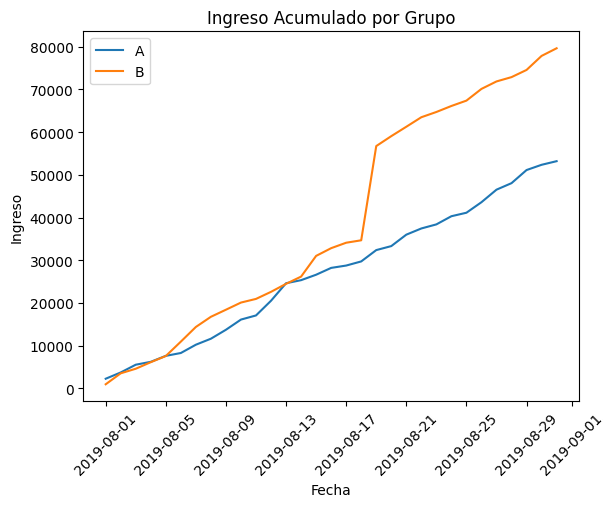

In [326]:
# Crear grafico de ingresos acumulados por dia y grupo de prueba A/B
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso')
plt.legend()
plt.xticks(rotation=45)
plt.show()

 - Grupo A: Comienza más bajo pero eventualmente supera al Grupo B. Indica que tuvo un inicio más lento pero generó un mayor ingreso acumulado al final del período observado.
 - Grupo B: Muestra un aumento constante pero no alcanza el mismo nivel de ingreso final que el Grupo A.

### Conclusión:

Ambos grupos aumentaron su ingreso acumulado con el tiempo.
Grupo A fue más exitoso en generar un mayor ingreso al final del período.
Las estrategias o condiciones aplicadas al Grupo A podrían haber sido más efectivas en términos de generación de ingresos.

## Representa gráficamente el tamaño de pedido promedio acumulado por grupo

Vamos a trazar el tamaño promedio de compra por grupo. Vamos a dividir los ingresos acumulados entre el número acumulado de pedidos:

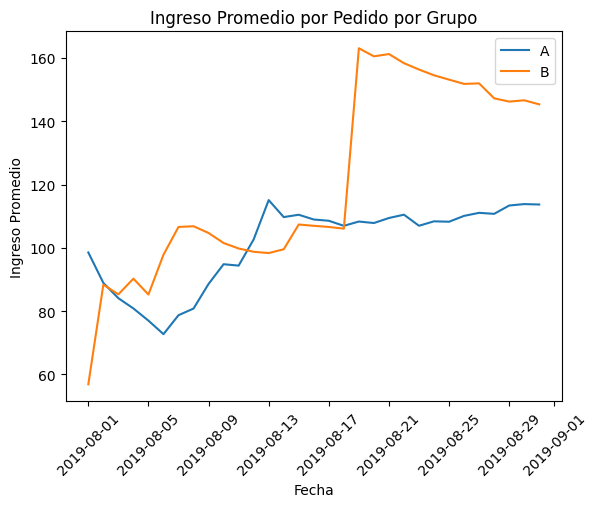

In [327]:
# Graficar tamaño promedio de compra por grupo
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label='A'
        )
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label='B'
        )
plt.title('Ingreso Promedio por Pedido por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Promedio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Conclusión:

Al igual que en el gráfico anterior, hay un pico en el monto promedio de compra. El monto promedio de compra también fue estable hacia el final de la prueba. Necesitamos más datos relacionados con este grupo para encontrar el monto promedio de compra real y establecer el nivel.

## Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

In [328]:
# Reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


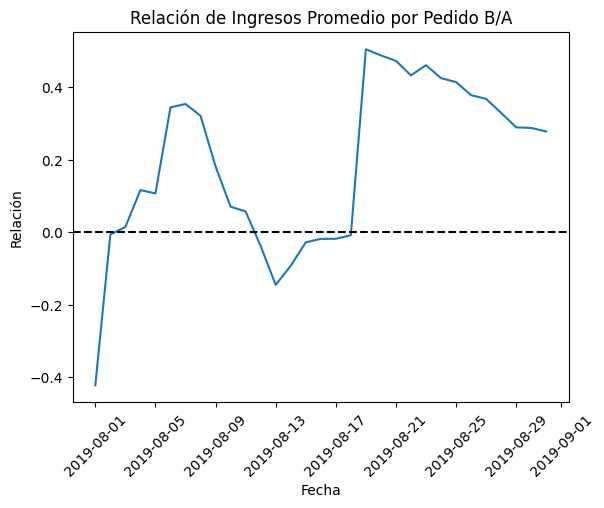

In [329]:
# Trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
        )
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relación de Ingresos Promedio por Pedido B/A')
plt.xlabel('Fecha')
plt.ylabel('Relación')
plt.xticks(rotation=45)
plt.show()

### Conclusión:

En algún momento, la diferencia entre los segmentos aumenta drásticamente. ¡Esto indica la presencia de grandes pedidos y valores atípicos! Vamos a profundizar en esto más adelante.

## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.

In [330]:
# Calcular la conversion acumulada
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Separar los datos por grupo
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

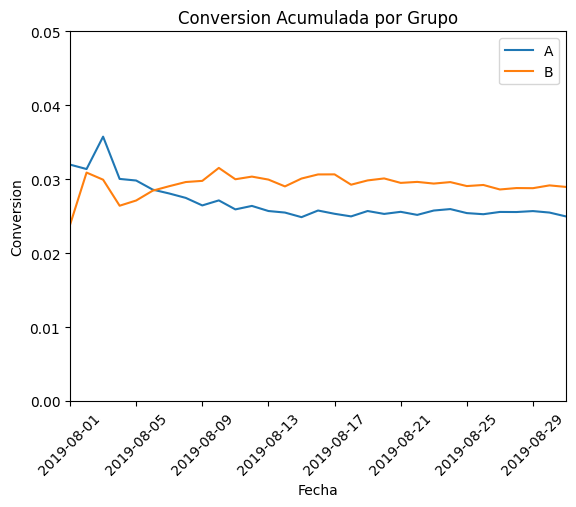

In [331]:
# Graficar la conversion acumulada por grupo
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.title('Conversion Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversion')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Conclusión:

Ambos grupos fluctuaron alrededor del mismo valor, pero luego la tasa de conversión del grupo **A** cayó antes de estabilizarse, mientras que la tasa de conversión del grupo **B** subió antes de finalmente también estabilizarse.


In [332]:
# Unir los datos en un DataFrame
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on='date', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


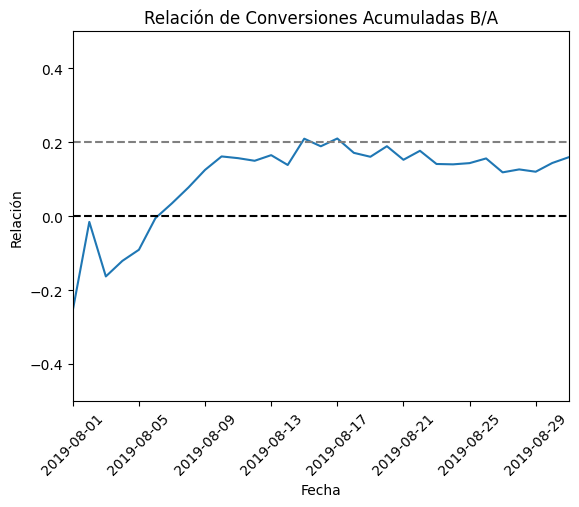

In [333]:
# Graficar la diferencia relativa de las conversiones acumuladas
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
plt.title('Relación de Conversiones Acumuladas B/A')
plt.xlabel('Fecha')
plt.ylabel('Relación')
plt.xticks(rotation=45)
plt.show()

### Conclusión:

Al principio de la prueba, el grupo **B** estaba muy por detrás, pero luego inesperadamente logró tomar la delantera. En general, la tasa de conversión no es estable, por lo que es demasiado pronto para concluir esta prueba. Sin embargo, lo primero que debemos observar son las anomalías; Estas anomalías probablemente cambiarán la grafica.

## Traza un gráfico de dispersión del número de pedidos por usuario

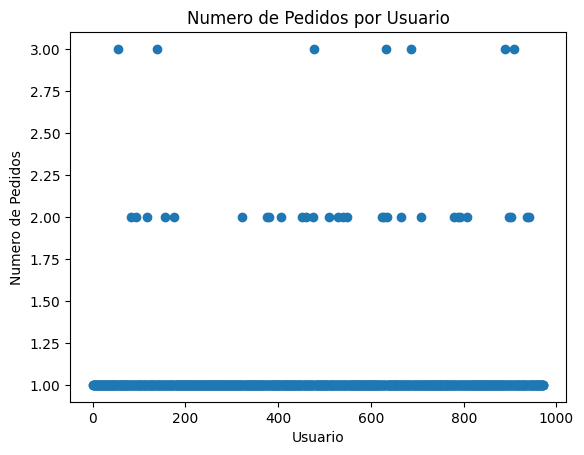

In [334]:
# Crear grafico de dispersion del numero de pedidos por usuario
ordersByUsers = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)

ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Numero de Pedidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Numero de Pedidos')
plt.show()

### Conclusión:

Podemos ver que la mayoría de los usuarios realizan solo 1 pedido. De hecho, hay muchos usuarios que realizan entre dos y cuatro pedidos. Desafortunadamente, el número exacto de porcentajes aún es desconocido, ya que todavía no está claro si debemos considerarlo una anomalía o no.

A continuación, calculemos el percentil para el número de pedidos por usuario par detectar si son anomalias:

## Calcula los percentiles 95 y 99 para el número de pedidos por usuario

In [335]:
# Calcular los percentiles del numero de pedidos por usuario
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


### Conclusión:

El número de usuarios que realizaron más de 1 pedido no superó el **5%**. Por lo tanto, podemos establecer un pedido por usuario como el límite inferior del número de pedidos a la vez para filtrar anomalías.

## Traza un gráfico de dispersión de los precios de los pedidos

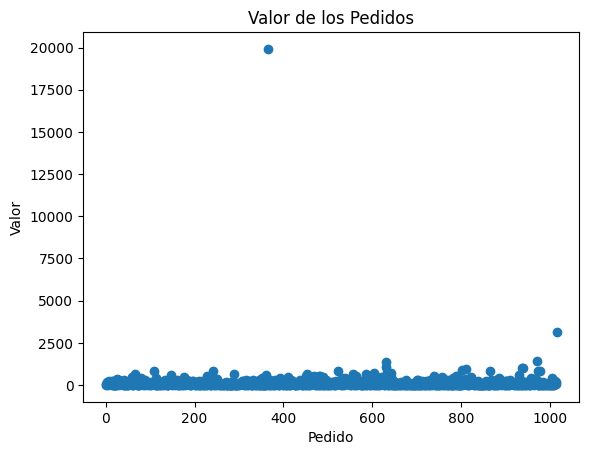

In [336]:
# Crear grafico de dispersion del valor de los pedidos
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Valor de los Pedidos')
plt.xlabel('Pedido')
plt.ylabel('Valor')
plt.show()

### Conclusión:

Hay algunos pedidos que son de gran tamaño. Basándonos en el gráfico anterior, podemos establecer un límite para los pedidos anormales, que es superior a **$2,500**. Sin embargo, en general, se filtrará el **1-5%** de los pedidos más extremos del valor observado.

Definamos los percentiles 95 y 99 para el tamaño promedio del pedido en nuestra muestra:

## Calcula los percentiles 95 y 99 de los precios de los pedidos

In [337]:
# Calcular los percentiles del valor de los pedidos
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


### Conclusión:

El porcentaje de pedidos con un costo superior a **$414** no es más del **5%**, mientras que las tarifas superiores a **$830** son como máximo el **1%**.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

In [338]:
# Calcular la significancia estadística de la diferencia de conversión entre los grupos
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Ahora necesitamos crear las variables `sampleA` y `sampleB`, que cargarán a los usuarios de los diferentes grupos y la cantidad de pedidos correspondiente. Para aquellos que no realizan un pedido, el valor será **0**. Esto es necesario para preparar las muestras para la prueba de Mann-Whitney.

La idea principal detrás de esta prueba es clasificar las dos muestras en orden ascendente y comparar el rango de valores que aparecen en ambas muestras (es decir, en qué posición aparecen en la muestra). Si la diferencia entre sus clasificaciones es la misma de una muestra a otra, esto significa que el desplazamiento es típico. Es decir, parte del valor se suma simplemente, causando que el resto se desplace.

Los desplazamientos no típicos señalan un cambio real. La suma de esos desplazamientos de clasificación (de #1 a #4 significa 3, etc.) es el valor del criterio. Cuanto mayor sea el número de desplazamientos en el rango, mayor será la probabilidad de diferencia en la distribución de las dos muestras. La probabilidad de obtener varios valores de la prueba de Mann-Whitney se ha calculado teóricamente, lo que nos permite concluir la presencia o ausencia de diferencias para cualquier grado de significancia establecido.

Aquí, los métodos no paramétricos son útiles, ya que no hacen suposiciones sobre cómo se distribuyen los datos (por lo que no tienes que estimar los parámetros de la distribución). Estos métodos se utilizan a menudo cuando los parámetros son difíciles (o incluso imposibles) de estimar como resultado de demasiados valores atípicos.

Para esta tarea específica de la prueba de Mann-Whitney, los pasos son:

1. Crear una lista del número de pedidos para cada usuario: `ordersByUsersA['orders']`.
2. Crear una serie de la longitud requerida llena de valores cero para aquellos usuarios que no realizaron un pedido: `pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')`.
3. Combinar el circuito con `pd.concat()`. Primero, debemos pasar lo que necesitamos incorporar al método. En nuestro caso, esta es una lista de la primera y segunda secciones. Luego, pasaremos un argumento indicando que el objeto `Series` se unirá por fila (en otras palabras, se escribirá secuencialmente) con el parámetro `axis = 0`.


In [339]:
# Crear un DataFrame con todos los usuarios y el numero de pedidos
sampleA = pd.concat(
    [ordersByUsersA['orders'], 
     pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat(
    [ordersByUsersB['orders'], 
     pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [340]:
# Calcular la significancia estadística
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Aqui podemois ver que ña diferencia es significativa, pero vamos a realizar la prueba con un valor en alpha de **0.05**:

In [341]:
# Calcular la significancia estadística de la diferencia de ingresos entre los grupos
alpha = 0.05
results1 = st.mannwhitneyu(sampleA, sampleB)
print('p-value:', results1.pvalue.round(3))

if results1.pvalue < alpha:
    print('Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa')
else:
    print('No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa')

print('Conversion de B es {0:.1%} mayor que la de A'.format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa
Conversion de B es 16.0% mayor que la de A


### Conclusión:

Basado en los datos crudos que usamos, resulta que hay una diferencia significativa entre los grupos **A** y **B**.

La primera línea del resultado obtenido nos da un valor p de **0.011**, que es menor que **0.05**. Por lo tanto, rechazamos la hipótesis nula porque hay una diferencia estadísticamente significativa en la conversión entre los grupos. La inclinación relativa del grupo **B** fue del **16%**.


## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

In [342]:
# Calcular la significancia estadística de la diferencia de tamaños de compra entre los grupos
results2 = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])
print('p-value:', results2.pvalue.round(3))

if results2.pvalue < alpha:
    print('Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa')
else:
    print('No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa')

print('Ingresos de B son {0:.1%} mayores que los de A'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-value: 0.862
No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa
Ingresos de B son 27.8% mayores que los de A


### Conclusión:

El valor p es mucho mayor que **0.05**, por lo que no podemos rechazar la hipótesis nula y concluir que el tamaño promedio de los pedidos entre los grupos es diferente. Sin embargo, el tamaño promedio del pedido para el grupo **B** es, de hecho, mucho mayor que el del grupo **A**.


## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

De acuerdo a los percentiles 95 y 99 para el tamaño promedio del pedido son de **$414** y **$830**. Mientras tanto, los percentiles 95 y 99 para el número de pedidos por usuario son **1** y **2 pedidos**.

Definiremos un usuario no natural (anomalía) como un usuario que realiza más de un pedido o un pedido con un valor superior a **$414**. Por lo tanto, eliminaremos el **5%** de los usuarios con el mayor número de pedidos y el **1-5%** de los usuarios con el valor de pedido más alto.


In [343]:
# Calcular la significancia estadística de la diferencia de conversiones entre los grupos
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id']], axis=0)

print('Usuarios con mas de 1 pedido que representan el 1% de los datos:', len(usersWithManyOrders), 'usuarios')

Usuarios con mas de 1 pedido que representan el 1% de los datos: 36 usuarios


In [344]:
# Calcular la significancia estadística de la diferencia de ingresos entre los grupos
usersWithExpensiveOrders = orders[orders['revenue'] > 414]['visitor_id']

print('Usuarios con pedidos caros que representan el 1% de los datos:', len(usersWithExpensiveOrders), 'usuarios')

Usuarios con pedidos caros que representan el 1% de los datos: 51 usuarios


In [352]:
# Unir los usuarios anormales
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print('-'*50)
print('Usuarios anomalos:', abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
--------------------------------------------------
Usuarios anomalos: 86


Vamos a descubrir el impacto de sus acciones en los resultados de la prueba. Calcularemos la significancia estadística de las diferencias de conversión entre grupos utilizando los datos filtrados. En primer lugar, configuraremos una muestra del número de pedidos por usuario para cada grupo de prueba:

1. **Crear una muestra del número de pedidos por usuario para cada grupo:**
   - Filtraremos los datos para eliminar los usuarios no naturales (anomalías) como se definió anteriormente.
   - Calcularemos el número de pedidos por usuario en cada grupo, excluyendo las anomalías.
   
2. **Realizar el análisis de significancia estadística:**
   - Utilizaremos la muestra filtrada para evaluar si las diferencias de conversión entre los grupos siguen siendo estadísticamente significativas.


In [346]:
# Calcular la significancia estadística de las diferencias en la conversión entre los grupos con datos filtrados
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [347]:
# Calcular la significancia estadística
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.016
0.174


Aqui podemos ver uan diferencia significativa, por lo que aplicaremos los criterios estadísticos de Mann-Whitney a la muestra resultante:

In [348]:
# Calcular la significancia estadística de las diferencias en los ingresos entre los grupos con datos filtrados
results3 = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-value:', results3.pvalue.round(3))

if results3.pvalue < alpha:
    print('Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa')
else:
    print('No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa')

print('Conversion de B es {0:.1%} mayor que la de A'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value: 0.016
Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa
Conversion de B es 17.4% mayor que la de A


### Conclusión:

Resulta que nuestros resultados permanecen inalterados. Aún hay una diferencia significativa entre los grupos **A** y **B**.

La primera línea del resultado obtenido nos da un valor p de **0.02**, que es menor que **0.05**. Por lo tanto, rechazamos la hipótesis nula porque hay una diferencia estadísticamente significativa en la conversión entre los grupos. La inclinación relativa del grupo **B** aumentó del **16%** al **16.7%**.


## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [349]:
# Calcular la significancia estadística de las diferencias en los tamaños de compra entre los grupos con datos filtrados
ordersAFiltered = orders[
    np.logical_and(orders['group'] == 'A', 
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']
ordersBFiltered = orders[
    np.logical_and(orders['group'] == 'B', 
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

In [350]:
# Calcular la significancia estadística
print('{0:.3f}'.format(st.mannwhitneyu(ordersAFiltered, ordersBFiltered)[1]))
print('{0:.3f}'.format(ordersBFiltered.mean() / ordersAFiltered.mean() - 1))

0.771
-0.033


In [351]:
# Calcular la significancia estadística de las diferencias en los ingresos entre los grupos con datos filtrados
result4 = st.mannwhitneyu(ordersAFiltered, ordersBFiltered)
print('p-value:', result4.pvalue.round(3))

if result4.pvalue < alpha:
    print('Se rechaza la hipotesis nula: La diferencia es estadisticamente significativa')
else:
    print('No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa')

print('Ingresos de B son {0:.1%} mayores que los de A'.format(ordersBFiltered.mean() / ordersAFiltered.mean() - 1))

p-value: 0.771
No se rechaza la hipotesis nula: No hay diferencia estadisticamente significativa
Ingresos de B son -3.3% mayores que los de A


### Conclusión:

El valor p disminuyó y ahora la diferencia entre los segmentos es de **-3%**. Aunque nuestras conclusiones generales de esta prueba no han cambiado, este ejemplo muestra claramente cómo las anomalías pueden afectar los resultados de las pruebas A/B.

## Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:  
  
  A. Para la prueba, considera a uno de los grupos como líder.  
  B. Para la prueba, concluye que no hay diferencia entre los grupos.  
  C. Continúa la prueba.

### Conclusiones

Las conclusiones que podemos extraer de esta prueba son:

1. **Diferencias en Conversiones:**
   - Tanto los datos crudos como los datos filtrados mostraron diferencias estadísticamente significativas en términos de conversiones entre los grupos.

2. **Tamaño Promedio del Pedido:**
   - Ni los datos crudos ni los datos filtrados mostraron diferencias estadísticamente significativas en términos de tamaño promedio del pedido entre los grupos.

3. **Resultados del Grupo B:**
   - Un gráfico que muestra las diferencias de conversión entre grupos indica que los resultados del grupo **B** son mejores, como lo demuestra un aumento del **16%**.

4. **Tamaño del Pedido:**
   - Un gráfico que muestra la diferencia en el tamaño promedio del pedido entre los grupos indica que los resultados del grupo **B** son más altos que los del grupo **A**. La presencia de anomalías puede haber sesgado los resultados, pero un método para filtrar estos valores atípicos muestra una disminución del **3%** en comparación con el grupo **A**.

5. **Hipótesis Probada:**
   - Esta prueba A/B se realizó para probar la hipótesis 3, que es:
     - **Agregar bloques de recomendaciones de productos al sitio web de la tienda. Esto aumentará la conversión y el tamaño promedio de la compra.**

Basado en estos hechos, se puede concluir que la prueba ha tenido éxito en parte. Existe una probabilidad de que el segmento **B** mejore en comparación con el segmento **A**. Por lo tanto, La opcion `C` es nuestra mejor opcion y continuar con la prueba un mes mas.
